In [11]:
#Memanggil lib pandas python untuk membaca table dari frame.len
import pandas as pd
df=pd.read_table("frame.len")

In [12]:
#Menampilkan data frame.len
df.head()

frame.number  frame.len
0             1         60
1             2        243
2             3        907
3             4        361
4             5       1514

In [13]:
df["frame.len"].describe()

count    370465.000000
mean        113.685358
std         151.247063
min          42.000000
25%          67.000000
50%          87.000000
75%          90.000000
max        1514.000000
dtype: float64

In [14]:
#memanggil lib pylab,numpy dan grafik matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


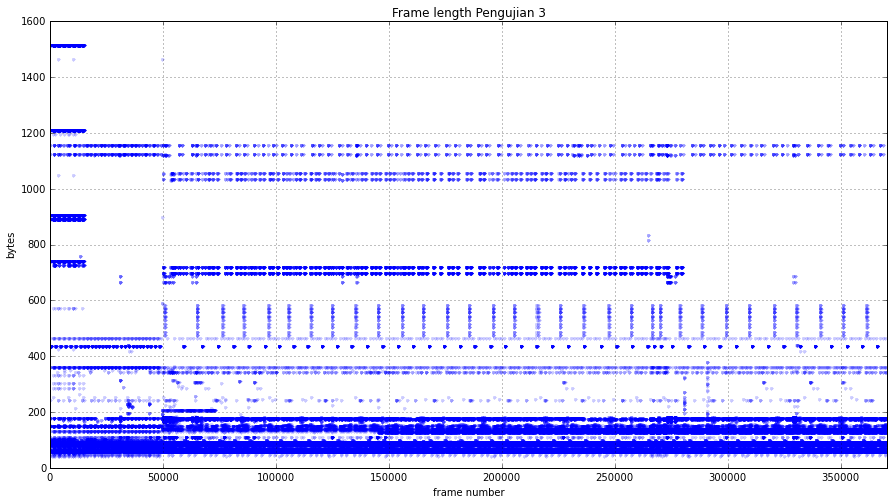

In [33]:
#generate grafik dari data frame.len
df["frame.len"].plot(style=".", alpha=0.2,figsize=(15,8))
title("Frame length Pengujian 3")
ylabel("bytes")
xlabel("frame number")

In [16]:
#Berikut merupakan hasil ektrak dari file pengujian3.pcap

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [19]:
#membaca data dari file pengujian3.csv
pengujian1=pd.read_csv("pengujian3.csv", parse_dates=['Time'])
pengujian1.head()

No.                Time             Source                     Destination  \
0    1 2015-12-09 17:04:00     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
1    2 2015-12-09 17:04:00      10.100.203.44                  10.100.203.255   
2    3 2015-12-09 17:04:01       10.100.203.6                   10.100.203.58   
3    4 2015-12-09 17:04:01  3comEuro_9a:82:d2                  LLDP_Multicast   
4    5 2015-12-09 17:04:01      10.100.203.58                    10.100.203.6   

  Protocol  Length                                               Info  
0      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1  BROWSER     243  Host Announcement RICY-PC, Workstation, Server...  
2      TCP     907  49264 > 8006 [PSH, ACK] Seq=1 Ack=1 Win=16135 ...  
3     LLDP     361  TTL = 120 System Name = Baseline Switch 2226-S...  
4      TCP    1514  8006 > 49264 [ACK] Seq=1 Ack=854 Win=501 Len=1460

In [20]:
#Desktripsi dari file ektrak pengujian3.pcap
pengujian1.describe()

No.         Length
count  370465.000000  370465.000000
mean   185233.000000     113.685358
std    106944.178075     151.247063
min         1.000000      42.000000
25%     92617.000000      67.000000
50%    185233.000000      87.000000
75%    277849.000000      90.000000
max    370465.000000    1514.000000

In [21]:
#Deskripsi dari Info dari file pengujian3.pcap
pengujian1['Info'].describe()

count                                   366505
unique                                   36425
top       Multicast Listener Report Message v2
freq                                     59359
dtype: object

In [22]:
#Menampilkan data tertentu berupa Time,Source IP, Destination IP, Protocol,Length,Info dari file pengujian1
infodata = pengujian1[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [23]:
infodata.head()

Time             Source                     Destination  \
0 2015-12-09 17:04:00     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
1 2015-12-09 17:04:00      10.100.203.44                  10.100.203.255   
2 2015-12-09 17:04:01       10.100.203.6                   10.100.203.58   
3 2015-12-09 17:04:01  3comEuro_9a:82:d2                  LLDP_Multicast   
4 2015-12-09 17:04:01      10.100.203.58                    10.100.203.6   

  Protocol  Length                                               Info  
0      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1  BROWSER     243  Host Announcement RICY-PC, Workstation, Server...  
2      TCP     907  49264 > 8006 [PSH, ACK] Seq=1 Ack=1 Win=16135 ...  
3     LLDP     361  TTL = 120 System Name = Baseline Switch 2226-S...  
4      TCP    1514  8006 > 49264 [ACK] Seq=1 Ack=854 Win=501 Len=1460

In [24]:
#Soure IP,destination IP dan Protocol di kelompokkan kemudian panjang paket di jumlahkan
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source                             Destination     Protocol        
0.0.0.0                            224.0.0.1       IGMPv2     28928
                                   255.255.255.255 DHCP       33054
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1         ICMPv6       258
10.100.130.13                      10.100.203.9    TCP         1080
10.100.130.3                       10.100.203.58   NTP         2520

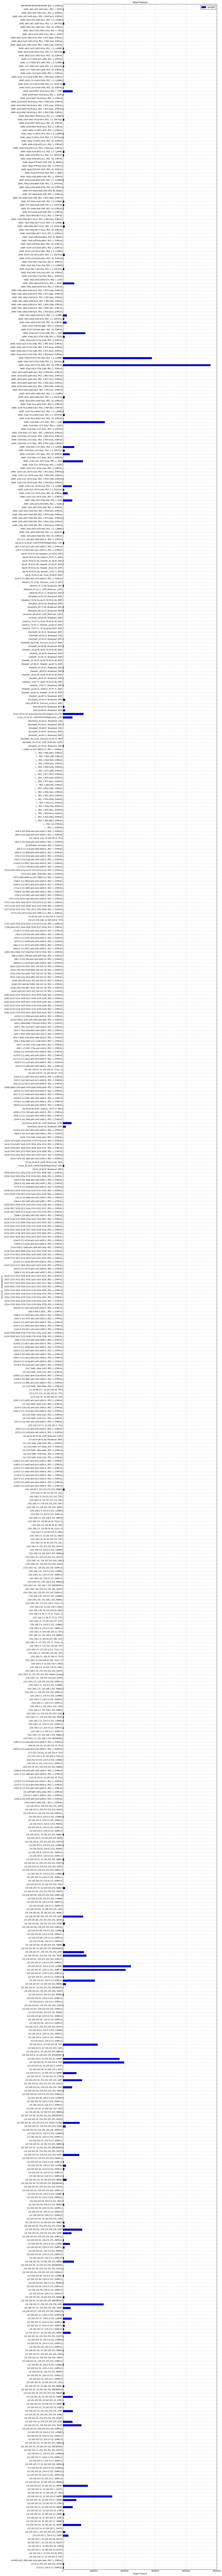

In [26]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 250))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [27]:
category_group.unstack().head()

Length             \
Protocol                                            ADwin Config  ARP  BJNP   
Source                             Destination                                
0.0.0.0                            224.0.0.1                 NaN  NaN   NaN   
                                   255.255.255.255           NaN  NaN   NaN   
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1                   NaN  NaN   NaN   
10.100.130.13                      10.100.203.9              NaN  NaN   NaN   
10.100.130.3                       10.100.203.58             NaN  NaN   NaN   

                                                                         \
Protocol                                            BROWSER  CDP   DHCP   
Source                             Destination                            
0.0.0.0                            224.0.0.1            NaN  NaN    NaN   
                                   255.255.255.255      NaN  NaN  33054   
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1              NaN  NaN    NaN   
10.100.130.13                      10.100.203.9         NaN  NaN    NaN   
10.100.130.3                       10.100.203.58        NaN  NaN    NaN   

                                                                               \
Protocol                                            DHCPv6  DNS  ICMP  ICMPv6   
Source                             Destination                                  
0.0.0.0                            224.0.0.1           NaN  NaN   NaN     NaN   
                                   255.255.255.255     NaN  NaN   NaN     NaN   
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1             NaN  NaN   NaN     258   
10.100.130.13                      10.100.203.9        NaN  NaN   NaN     NaN   
10.100.130.3                       10.100.203.58       NaN  NaN   NaN     NaN   

                                                     ...                     \
Protocol                                             ...    SNMP  SSDP  SSL   
Source                             Destination       ...                      
0.0.0.0                            224.0.0.1         ...     NaN   NaN  NaN   
                                   255.255.255.255   ...     NaN   NaN  NaN   
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1           ...     NaN   NaN  NaN   
10.100.130.13                      10.100.203.9      ...     NaN   NaN  NaN   
10.100.130.3                       10.100.203.58     ...     NaN   NaN  NaN   

                                                                               \
Protocol                                            STP   TCP  TLSv1  TLSv1.2   
Source                             Destination                                  
0.0.0.0                            224.0.0.1        NaN   NaN    NaN      NaN   
                                   255.255.255.255  NaN   NaN    NaN      NaN   
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1          NaN   NaN    NaN      NaN   
10.100.130.13                      10.100.203.9     NaN  1080    NaN      NaN   
10.100.130.3                       10.100.203.58    NaN   NaN    NaN      NaN   

                                                                   
Protocol                                            UDP  WOL  XID  
Source                             Destination                     
0.0.0.0                            224.0.0.1        NaN  NaN  NaN  
                                   255.255.255.255  NaN  NaN  NaN  
0:4000:4011:8fb3:a64:cb1d:a64:cb0a ff02::1          NaN  NaN  NaN  
10.100.130.13                      10.100.203.9     NaN  NaN  NaN  
10.100.130.3                       10.100.203.58    NaN  NaN  NaN  

[5 rows x 30 columns]

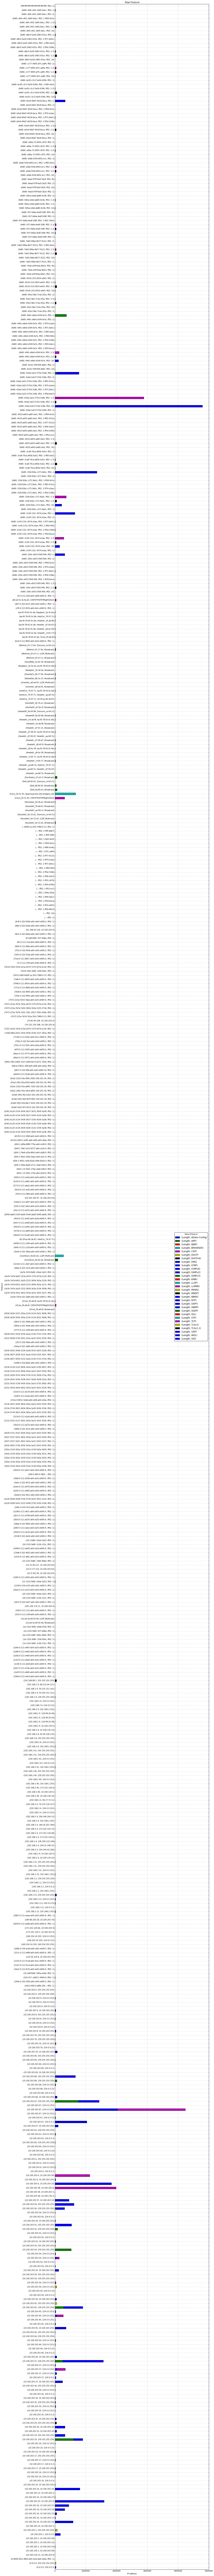

In [28]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 250))
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")

In [29]:
infodata2 = pengujian1[['Time','Length','Info']]
infodata2.head()

Time  Length  \
0 2015-12-09 17:04:00      60   
1 2015-12-09 17:04:00     243   
2 2015-12-09 17:04:01     907   
3 2015-12-09 17:04:01     361   
4 2015-12-09 17:04:01    1514   

                                                Info  
0  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1  Host Announcement RICY-PC, Workstation, Server...  
2  49264 > 8006 [PSH, ACK] Seq=1 Ack=1 Win=16135 ...  
3  TTL = 120 System Name = Baseline Switch 2226-S...  
4  8006 > 49264 [ACK] Seq=1 Ack=854 Win=501 Len=1460

In [30]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

Length                                               Info
Time                                                                          
2015-12-09 17:04:00      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...
2015-12-09 17:04:00     243  Host Announcement RICY-PC, Workstation, Server...
2015-12-09 17:04:01     907  49264 > 8006 [PSH, ACK] Seq=1 Ack=1 Win=16135 ...
2015-12-09 17:04:01     361  TTL = 120 System Name = Baseline Switch 2226-S...
2015-12-09 17:04:01    1514  8006 > 49264 [ACK] Seq=1 Ack=854 Win=501 Len=1460

In [31]:
infodata2.resample('T',how=sum).head()

Length
Time                       
2015-12-09 17:04:00  108404
2015-12-09 17:05:00  186828
2015-12-09 17:06:00   99872
2015-12-09 17:07:00  114765
2015-12-09 17:08:00  108320

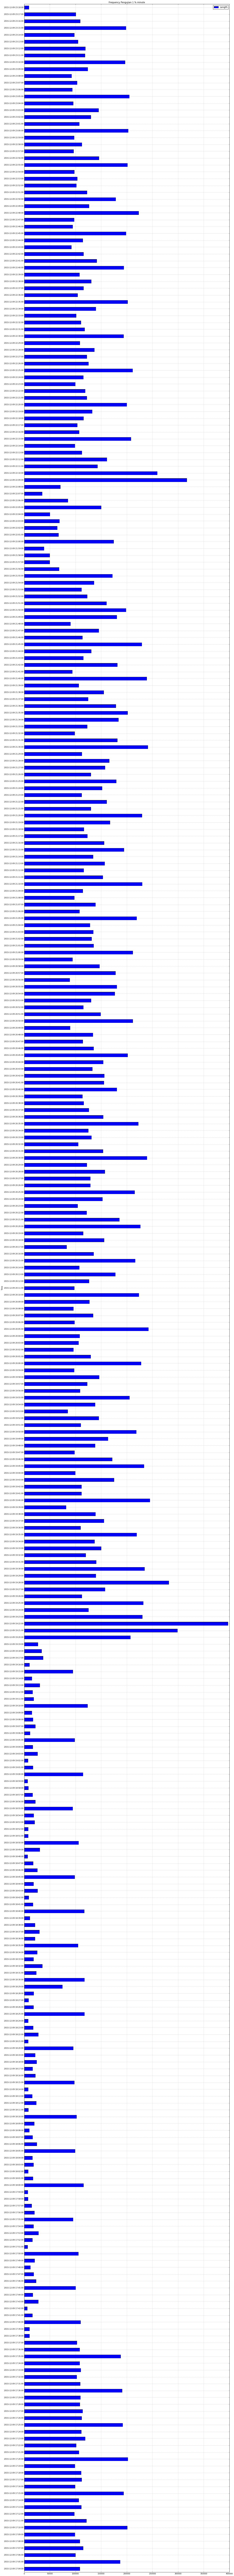

In [32]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Pengujian 1 % minute",style="r",figsize=(20,250))